In [5]:
import camb
import pyccl as ccl
import numpy as np
import matplotlib
from scipy.stats import binned_statistic as bs
mpl = matplotlib
mpl.use('Agg') # Must be before importing matplotlib.pyplot
mpl.rcParams['font.size'] = 13.0
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.fontsize'] = 'small'
mpl.rcParams['figure.dpi'] = 200.0
mpl.rcParams['lines.markersize'] = 4.0
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['xtick.major.size'] = 5.0
mpl.rcParams['xtick.minor.size'] = 3.0
mpl.rcParams['ytick.major.size'] = 5.0
mpl.rcParams['ytick.minor.size'] = 3.0
import matplotlib.pyplot
plt = matplotlib.pyplot
from astropy.table import Table
import sys
sys.path.insert(0,'/global/homes/p/plarsen/gcr-catalogs')
import GCR
from GCR import GCRQuery
import GCRCatalogs           

import time

%matplotlib inline

These are files of all the buzzard and cosmodc2 galaxies at R<24, z<1 in the same sky area (~200 square degrees)

In [6]:
import astropy
import astropy.table
file_name = '/global/projecta/projectdirs/lsst/groups/CS/cosmoDC2/plarsen_tmp/cutout_cat/cosmodc2_cutout_comp.fits'
file_name2 = '/global/projecta/projectdirs/lsst/groups/CS/cosmoDC2/plarsen_tmp/cutout_cat/buzzard_cutout_comp.fits'

file_in = astropy.table.Table.read(file_name)
file_in_b = astropy.table.Table.read(file_name2)



In [9]:
def make_sg_plot(data,cat_name):
    bn=500
    s1 = data['SHEAR1']
    s2 = data['SHEAR2']
    a, zedge, binn = bs(s1, s2, bins=bn, statistic='mean')
    a2, zedge2, binn = bs(s2, s1, bins=bn, statistic = 'mean')
    zvals = (zedge[1:]+zedge[:-1])/2.
    zvals2 = (zedge2[1:]+zedge2[:-1])/2.

    plt.figure()
    plt.title(cat_name)
    plt.plot(zvals,a,label='shear_1')
    plt.plot(zvals2,a2,label='shear_2')
    plt.xlim([-0.05,0.05])
    plt.ylim([-0.01,0.01])
    plt.plot(zvals,np.zeros(len(a)),'k--')
    plt.legend()
    plt.show()
    return
def make_sg_plot_comp(data,data2,cat_name):
    bn=500
    s1 = data['SHEAR1']
    s2 = data['SHEAR2']
    s1b = data2['SHEAR1']
    s2b = data2['SHEAR2']

    a, zedge, binn = bs(s1, s2, bins=bn, statistic='mean')
    a2, zedge2, binn = bs(s2, s1, bins=bn, statistic = 'mean')
    zvals = (zedge[1:]+zedge[:-1])/2.
    zvals2 = (zedge2[1:]+zedge2[:-1])/2.
    
    ab, zedgeb, binnb = bs(s1b, s2b, bins=bn, statistic='mean')
    a2b, zedge2b, binnb = bs(s2b, s1b, bins=bn, statistic = 'mean')
    zvalsb = (zedgeb[1:]+zedgeb[:-1])/2.
    zvals2b = (zedge2b[1:]+zedge2b[:-1])/2.


    plt.figure()
    plt.title(cat_name)
    plt.plot(zvals,a,label='shear_1')
    plt.plot(zvals2,a2,label='shear_2')
    plt.plot(zvalsb,ab,label='shear_1 buzzard')
    plt.plot(zvals2b,a2b,label='shear_2 buzzard')
    plt.xlim([-0.05,0.05])
    plt.ylim([-0.01,0.01])
    plt.plot(zvals,np.zeros(len(a)),'k--')
    plt.legend()
    plt.show()
    return
def make_sg_plot_comp_zoom(data,data2,cat_name):
    bn=100
    s1 = data['SHEAR1']
    s2 = data['SHEAR2']
    s1b = data2['SHEAR1']
    s2b = data2['SHEAR2']

    a, zedge, binn = bs(s1, s2, bins=bn, statistic='mean')
    a2, zedge2, binn = bs(s2, s1, bins=bn, statistic = 'mean')
    zvals = (zedge[1:]+zedge[:-1])/2.
    zvals2 = (zedge2[1:]+zedge2[:-1])/2.
    
    ab, zedgeb, binnb = bs(s1b, s2b, bins=bn, statistic='mean')
    a2b, zedge2b, binnb = bs(s2b, s1b, bins=bn, statistic = 'mean')
    zvalsb = (zedgeb[1:]+zedgeb[:-1])/2.
    zvals2b = (zedge2b[1:]+zedge2b[:-1])/2.


    plt.figure()
    plt.title(cat_name)
    plt.plot(zvals,a,label='shear_1')
    plt.plot(zvals2,a2,label='shear_2')
    plt.plot(zvalsb,ab,label='shear_1 buzzard')
    plt.plot(zvals2b,a2b,label='shear_2 buzzard')
    plt.xlim([-0.05,0.05])
    plt.ylim([-0.005,0.005])
    plt.plot(zvals,np.zeros(len(a)),'k--')
    plt.legend()
    plt.show()
    return

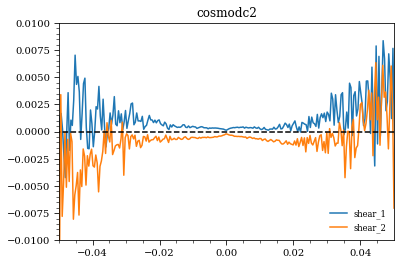

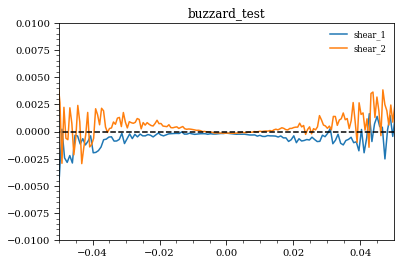

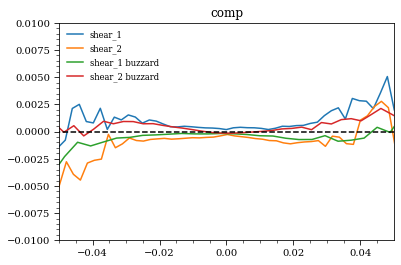

In [10]:
make_sg_plot(file_in,'cosmodc2')
make_sg_plot(file_in_b,'buzzard_test')
make_sg_plot_comp(file_in,file_in_b,'comp')
make_sg_plot_comp_zoom(file_in,file_in_b,'comp')